# Lab 3: Lab Hardware Bring-up & Testing
#### Andrew Phillips

## Prelab: Assemble Lab Power-Converter Hardware

During the prelab, we assembled our lab hardware modelled by our PLECS model from the previous lab, Digital Twin. This assembly included placing surface mount components on our given bare PCB with solder paste and soldering those components by reflowing the board with an oven in EE Proto room. We then hand soldered pin sockets into the board to provide flexibility in swapping out components during the lab. Lastly, we soldered the required through-hole components to complete our board assembly. Suki and I worked together to reflow the board and solder the pin sockets. Independently, I soldered the remaining through-hole components on the board, while Suki assembled our load resistor.

#### Reflowing Surface Mounted Components

To begin our assembly, we used the provided stencil to apply solder paste, then carefully placed the surface mount components on the solder pasted pads. In this stage, we carefully referenced our board against the provided images and schematic to ensure that the components were in the correct orientation before reflowing the board. Neither Suki or I had used a reflow oven before, but we were able to ask several other students in the proto room about which profiles to use and what to do at each step of the reflow profile.

Our board after reflow:

![after_reflow](images/post_reflow.jpg)

The reflow did not fully melt all of the solder paste that we applied to the board, especially on the legs of the U2 chip. To remedy this, we touched up these sections of the board by hand with a soldering iron. After a visual inspection and comparison against the provided reference image, we moved on to soldering the pin sockets.

#### Soldering Through-Hole Components

Soldering the pin sockets was not too difficult. We initially experimented with several different strategies to solder in the sockets, but we found the most effective method to be placing the pin socket in the board, pressing the soldering iron into the socket to heat it and hold it in place, and then applying solder on the other side of the board. With this method, we were able to solder the rest of the pin sockets in relatively painlessly.

Our board after soldering in the pin sockets:

![pin_sockets](images/pin_sockets_soldered.jpg)

The rest of the through-hole components were also similarly not too bad. I used tweezers to hold the headers in place while soldering, while the rest of the through-hole components were large enough to hold in place relatively easy while soldering.

Our board after soldering the remaining through-hole components:

![through-hole_soldered](images/through-hole_soldered.jpg)

To finish our board assembly, I screwed in the plastic standoffs by hand to ensure none of the components were touching the lab bench during use. After finishing the board, I carefully inspected the board against the reference images and BOM to ensure we did not miss any components during assembly.

Finished board assembly:

![finished_board](images/finished_board.jpg)

After checking the board with Beat, we found that although the components were soldered sufficiently, some of the through-hole components could also use more a little more solder to close some gaps between the component legs and the board. We will make sure to touch up these components as a next step.

#### Load Resistor Assembly

To assemble the load resistor, we had to ensure our resistor had good contact with the heatsink to effectively keep the resistor cool during lab operation. To ensure this, Suki tapped holes into the provided heatsink and applied thermal paste to the heatsink to ensure good thermal contact. She then attached a fan to the heatsink to help dissipate the heat generated over the heatsink. To finish the assembly, she soldered wires from the terminals of the resistor and connected the leads to a pin header connector to attach to our board, then covered the solder connections with heatshrink.

Finished load resistor:

![load_resistor](images/load_resistor_completed.jpg)

## Data Collection

During the lab period, we worked to bring up our assembled board to ensure that it was assembled correctly and could properly exhibit switching in buck operation mode. Unfortunately, this verification did not go as smoothly as we hoped.

#### Task 1

We started verification by testing the power rails of our board. When connecting our power supply to the output of the converter, we found that our LED2 (red) did not light up. After some visual inspection and quick board reworks to try flipping the LED's polarity, we found that the LED had burned out. Replacing this component with a new LED allowed our board to exhibit proper behavior for this step.

#### Task 2

We then moved on to testing the basic operation of the UC2844 chip. To perform this test, we inserted the chip into the U1 sockets, as well as jumpers JP1, JP6, and JP4 to connect the chip's compensator network to the board. We then inserted gate resistor R12 and a scope probe at TP6 to measure the gate voltage of the main switching MOSFET for our converter.

Task 2 Setup:

![task_2_setup](images/task_2_setup.jpg)

Unfortunately, instead of seeing a consistent switching waveform like we expected, we only saw electrical noise in our probed gate voltage waveform. During the lab period we investigated some potential issues with our board, including checking component polarity and visually inspecting solder joints, but in the interest of time we used Beat's board to collect the rest of the data for this lab. We will need to spend more time outside of class debugging our board to ensure it outputs the waveforms we expect to see.

One reason I think our board is not working properly is the reflow stage of our assembly not completely melting all the solder joints for our surface mounted components. During our initial assembly, after our first reflow, we saw that not all of the joints completely melted, so we reflowed the board a second time and then touched up remaining solder joints by hand with a soldering iron. I believe that some of these components might still not be fully soldered to the board, which I will double check when debugging it. I will also add more solder to some of the through-hole component connections to make sure they are also have good contact with the board.

After switching to Beat's board, we were able to verify the UC2844 chip's intended behavior on our waveform. The waveform has been plotted below in the 'Plotting Data' section of this report. From that waveform, we can calculate the following parameters:

Switching frequency: 50.63kHz

Duty cycle: 0.463

Amplitude: 16.62V

#### Tasks 3 and 4

Our next step was testing buck converter operation. We added the switching MOSFET Q1, main buck diode D7, and test inductor 10 to our board to complete the buck converter.

Task 3 Buck Setup:

![task_3_setup](images/task_3_buck_setup.jpg)

Connecting our power supply to our board showed buck behavior we expected, measuring at various points in the circuit including the shunt voltage for measuring the current through our switching FET, FET drain voltage, gate driver output voltage, and gate voltage. By using our board's potentiometer, we adjusted the voltage divider in UC2844's compensator network to adjust the output voltage of the buck converter to measure these traces in the circuit for output voltages of 4V, 7V, and 9V. 

## Plotting Data

Data from the oscilloscope was saved as a CSV. The following code block loads the data into this Jupyter notebook and processes it for plotting with matplotlib. A rolling average was applied to the data for cleaner output waveforms.

Note that the output voltages we measured at each potentiometer setting were not set exactly at 4V, 7V, and 9V. The actual measured output voltages are included below:

Task 3:

"4V" test: 4.026V output voltage

"7V" test: 7.10V output voltage

"9V" test: 9.11V output voltage

Task 4:

"4V" test: 4.06V output voltage

"7V" test: 7.02V output voltage

"9V" test: 9.06V output voltage

Another note for data from Task 3 and Task 4: We accidently set one of the scope probes (all traces labeled CH1) to its 1x setting instead of its 10x setting. This resulted in traces that are exactly 1/10 of their actual value. Due to these small signals, the data for these waveforms has a lot more noise than the CH2 measurements during these tasks. I have scaled these CH1 traces by 10 in these plots to represent the actual values captured by the waveforms.

In [115]:
# import necessary python libraries

import pandas as pd
import matplotlib.pyplot as plt
import csv

In [116]:
# read funky Rigol CSV format
def read_rigol_csv(csv_file_name):
    with open(csv_file_name) as f:
        rows = list(csv.reader(f))
        i = 0
        while rows[0][i] != "":
            i = i+1
        numcols = i-2
        t0 = float(rows[1][numcols])
        dT = float(rows[1][numcols+1])
    data = pd.read_csv(csv_file_name, usecols=range(0,numcols), skiprows=[1])
    data['X'] = t0+data['X']*dT
    return data, t0, dT

#### Task 2 plot:

Text(0.5, 1.0, 'Task 2: FET Gate Voltage')

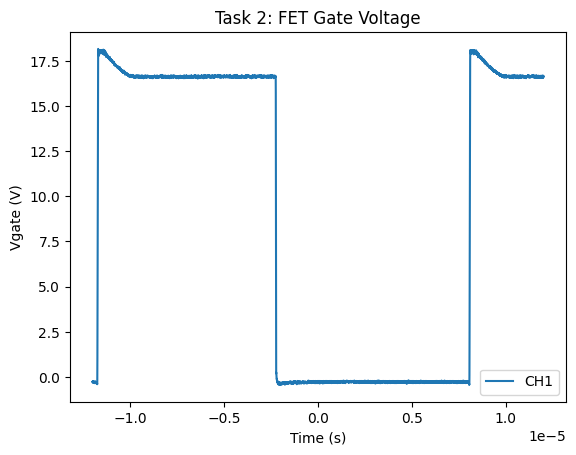

In [117]:
# Task 2 data: gate voltage (without buck hardware)
[task_2_data, task_2_t0, task_2_dT] = read_rigol_csv('data/Task2.csv')

# data filter
task_2_data['CH1'] = task_2_data['CH1'].rolling(10).mean()

# plot
fig, ax = plt.subplots()
task_2_data.plot(x="X", y="CH1", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vgate (V)")
ax.set_title("Task 2: FET Gate Voltage")

#### Task 3 plots:

On the shunt voltage plots, two points have been highlighted on each plot for a linear approximation used in the mystery inductance calculation.

(-8.5e-06, 1.5e-05)

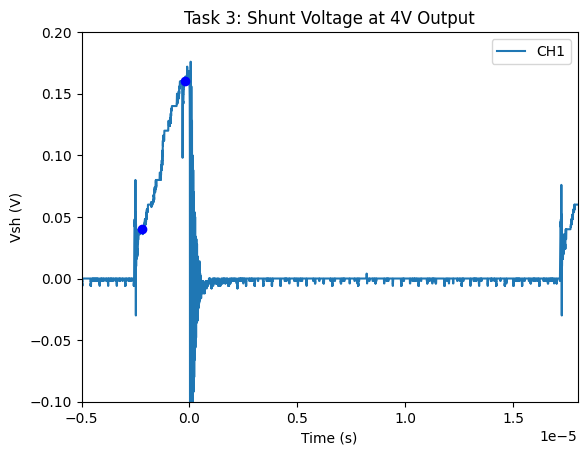

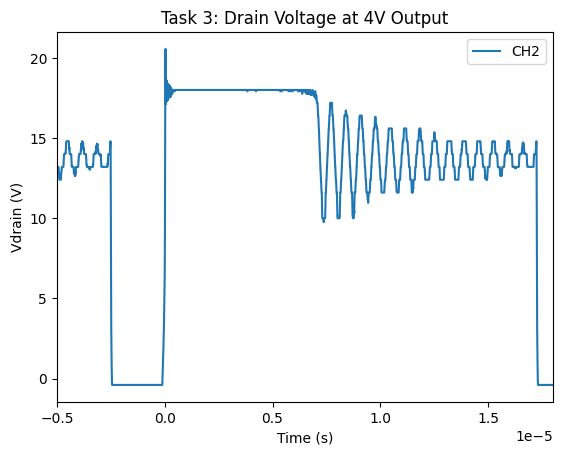

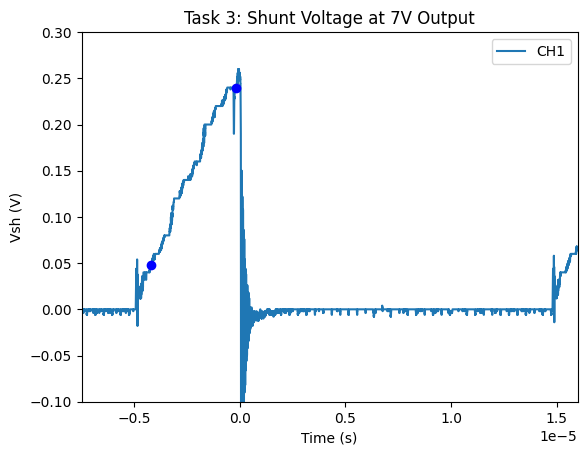

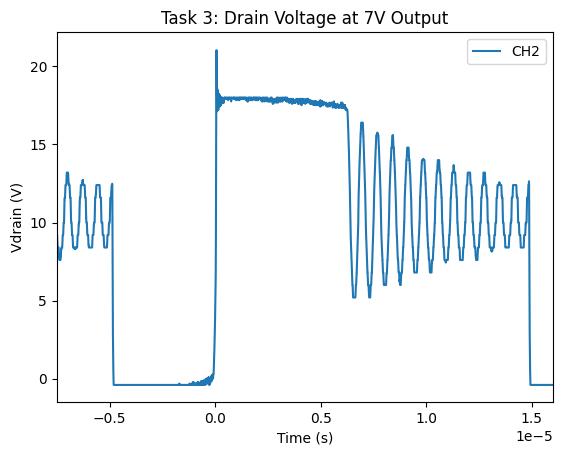

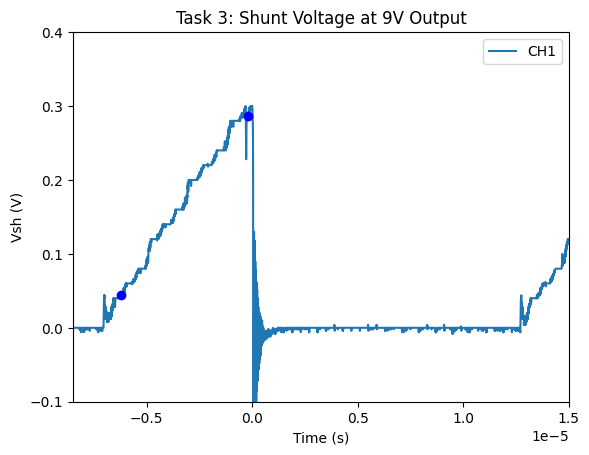

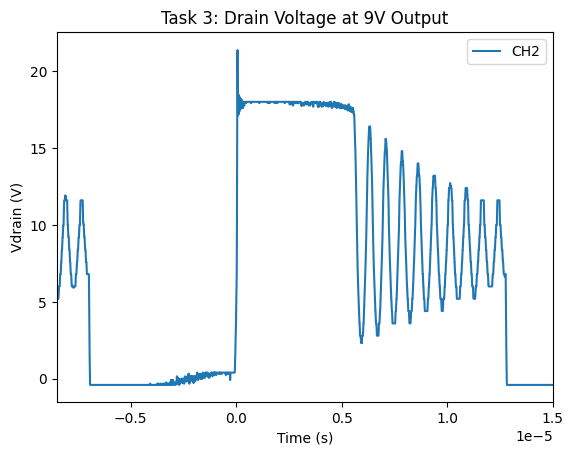

In [118]:
# Task 3 data: shunt voltage and drain voltage at different output voltages
[task_3_4V_data, task_3_4V_t0, task_2_4V_dT] = read_rigol_csv('data/Task3_4V.csv')
[task_3_7V_data, task_3_7V_t0, task_2_7V_dT] = read_rigol_csv('data/Task3_7V.csv')
[task_3_9V_data, task_3_9V_t0, task_2_9V_dT] = read_rigol_csv('data/Task3_9V.csv')

# scale CH1 data by 10
task_3_4V_data = task_3_4V_data.mul({"CH1":10,"CH2":1,"X":1})
task_3_7V_data = task_3_7V_data.mul({"CH1":10,"CH2":1,"X":1})
task_3_9V_data = task_3_9V_data.mul({"CH1":10,"CH2":1,"X":1})

#4V plots

# data filter
task_3_4V_data['CH1'] = task_3_4V_data['CH1'].rolling(10).mean()
task_3_4V_data['CH2'] = task_3_4V_data['CH2'].rolling(10).mean()

# plot shunt voltage
fig, ax = plt.subplots()
task_3_4V_data.plot(x="X", y="CH1", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vsh (V)")
ax.set_title("Task 3: Shunt Voltage at 4V Output")
ax.set_xlim((-0.5e-5,1.8e-5))
ax.set_ylim((-0.1,0.2))
ax.plot(task_3_4V_data['X'].get(17500), task_3_4V_data['CH1'].get(17500), "bo")
ax.plot(task_3_4V_data['X'].get(18500), task_3_4V_data['CH1'].get(18500), "bo")

# plot drain voltage
fig, ax = plt.subplots()
task_3_4V_data.plot(x="X", y="CH2", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vdrain (V)")
ax.set_title("Task 3: Drain Voltage at 4V Output")
ax.set_xlim((-0.5e-5,1.8e-5))

#7V plots

# data filter
task_3_7V_data['CH1'] = task_3_7V_data['CH1'].rolling(10).mean()
task_3_7V_data['CH2'] = task_3_7V_data['CH2'].rolling(10).mean()

# plot shunt voltage
fig, ax = plt.subplots()
task_3_7V_data.plot(x="X", y="CH1", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vsh (V)")
ax.set_title("Task 3: Shunt Voltage at 7V Output")
ax.set_xlim((-0.75e-5,1.6e-5))
ax.set_ylim((-0.1,0.3))
ax.plot(task_3_7V_data['X'].get(16500), task_3_7V_data['CH1'].get(16500), "bo")
ax.plot(task_3_7V_data['X'].get(18500), task_3_7V_data['CH1'].get(18500), "bo")

# plot drain voltage
fig, ax = plt.subplots()
task_3_7V_data.plot(x="X", y="CH2", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vdrain (V)")
ax.set_title("Task 3: Drain Voltage at 7V Output")
ax.set_xlim((-0.75e-5,1.6e-5))

#9V plots

# data filter
task_3_9V_data['CH1'] = task_3_9V_data['CH1'].rolling(10).mean()
task_3_9V_data['CH2'] = task_3_9V_data['CH2'].rolling(10).mean()

# plot shunt voltage
fig, ax = plt.subplots()
task_3_9V_data.plot(x="X", y="CH1", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vsh (V)")
ax.set_title("Task 3: Shunt Voltage at 9V Output")
ax.set_xlim((-0.85e-5,1.5e-5))
ax.set_ylim((-0.1,0.4))
ax.plot(task_3_9V_data['X'].get(15500), task_3_9V_data['CH1'].get(15500), "bo")
ax.plot(task_3_9V_data['X'].get(18500), task_3_9V_data['CH1'].get(18500), "bo")

# plot drain voltage
fig, ax = plt.subplots()
task_3_9V_data.plot(x="X", y="CH2", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vdrain (V)")
ax.set_title("Task 3: Drain Voltage at 9V Output")
ax.set_xlim((-0.85e-5,1.5e-5))

#### Task 4 plots:

One note with this data is our gate drive voltage at 4V does not have the expected waveform, but the gate drive voltages at 7V and 9V do. This may have been due to the probe not having a solid contact with the board during this test. We will ensure that our probes have good contact with our board in the future. We can also see the duty cycle increasing as the output voltage increases, which makes sense as we charge the inductor for longer and longer to support these higher output voltages.

(-2.5e-05, 5e-06)

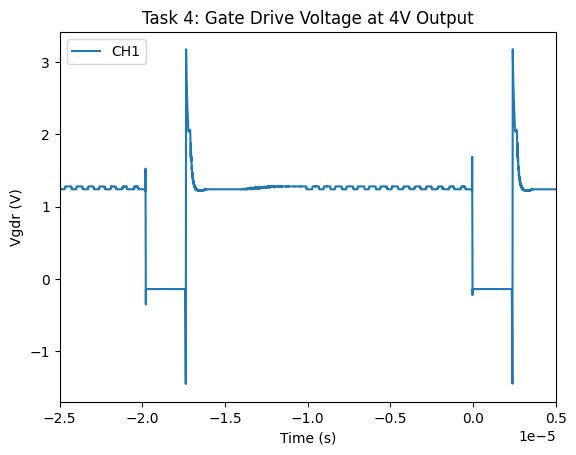

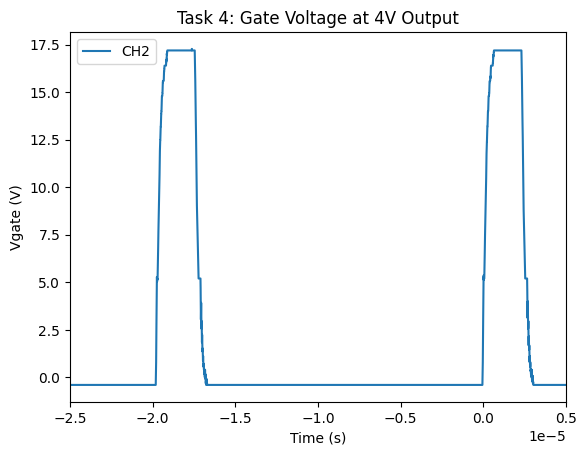

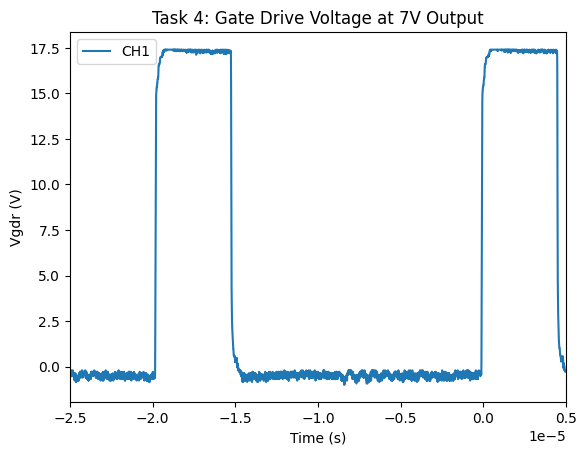

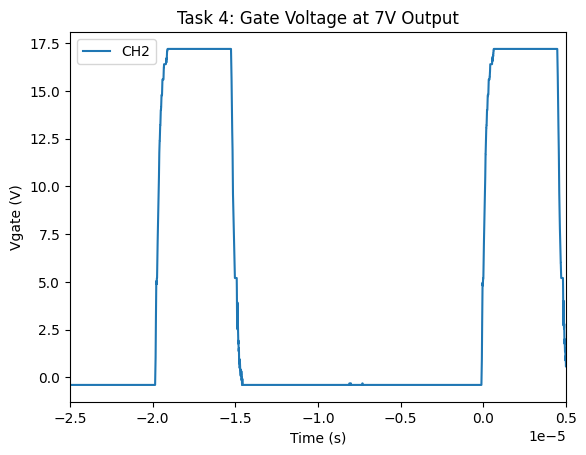

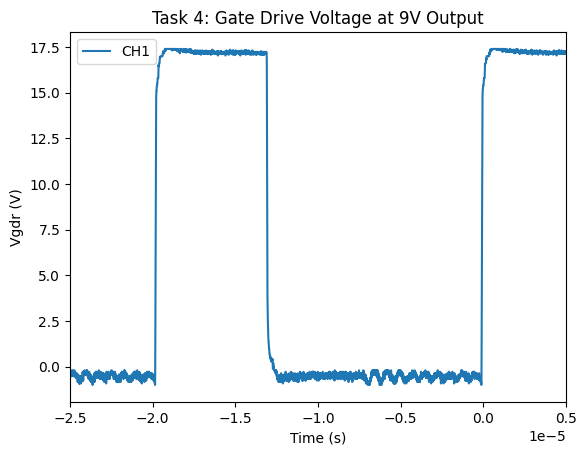

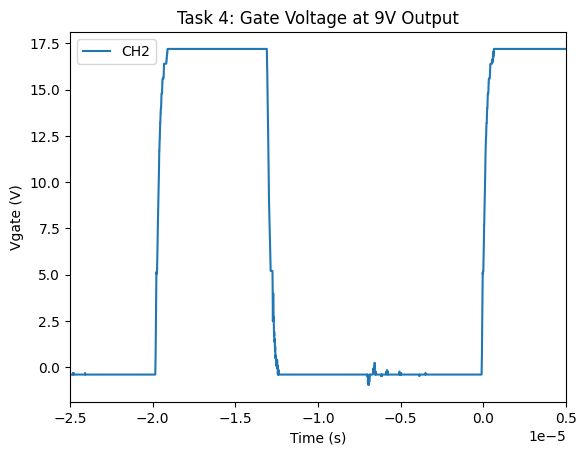

In [119]:
# Task 4 data: gate driver output and gate voltage at different output voltages
[task_4_4V_data, task_4_4V_t0, task_4_4V_dT] = read_rigol_csv('data/Task4_4V.csv')
[task_4_7V_data, task_4_7V_t0, task_4_7V_dT] = read_rigol_csv('data/Task4_7V.csv')
[task_4_9V_data, task_4_9V_t0, task_4_9V_dT] = read_rigol_csv('data/Task4_9V.csv')

# scale CH1 data by 10
task_4_4V_data = task_4_4V_data.mul({"CH1":10,"CH2":1,"X":1})
task_4_7V_data = task_4_7V_data.mul({"CH1":10,"CH2":1,"X":1})
task_4_9V_data = task_4_9V_data.mul({"CH1":10,"CH2":1,"X":1})

#4V plots

# data filter
task_4_4V_data['CH1'] = task_4_4V_data['CH1'].rolling(10).mean()
task_4_4V_data['CH2'] = task_4_4V_data['CH2'].rolling(10).mean()

# plot gate drive voltage
fig, ax = plt.subplots()
task_4_4V_data.plot(x="X", y="CH1", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vgdr (V)")
ax.set_title("Task 4: Gate Drive Voltage at 4V Output")
ax.set_xlim((-2.5e-5,0.5e-5))

# plot gate voltage
fig, ax = plt.subplots()
task_4_4V_data.plot(x="X", y="CH2", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vgate (V)")
ax.set_title("Task 4: Gate Voltage at 4V Output")
ax.set_xlim((-2.5e-5,0.5e-5))

#7V plots

# data filter
task_4_7V_data['CH1'] = task_4_7V_data['CH1'].rolling(10).mean()
task_4_7V_data['CH2'] = task_4_7V_data['CH2'].rolling(10).mean()

# plot gate drive voltage
fig, ax = plt.subplots()
task_4_7V_data.plot(x="X", y="CH1", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vgdr (V)")
ax.set_title("Task 4: Gate Drive Voltage at 7V Output")
ax.set_xlim((-2.5e-5,0.5e-5))

# plot gate voltage
fig, ax = plt.subplots()
task_4_7V_data.plot(x="X", y="CH2", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vgate (V)")
ax.set_title("Task 4: Gate Voltage at 7V Output")
ax.set_xlim((-2.5e-5,0.5e-5))

#9V plots

# data filter
task_4_9V_data['CH1'] = task_4_9V_data['CH1'].rolling(10).mean()
task_4_9V_data['CH2'] = task_4_9V_data['CH2'].rolling(10).mean()

# plot gate drive voltage
fig, ax = plt.subplots()
task_4_9V_data.plot(x="X", y="CH1", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vgdr (V)")
ax.set_title("Task 4: Gate Drive Voltage at 9V Output")
ax.set_xlim((-2.5e-5,0.5e-5))

# plot gate voltage
fig, ax = plt.subplots()
task_4_9V_data.plot(x="X", y="CH2", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vgate (V)")
ax.set_title("Task 4: Gate Voltage at 9V Output")
ax.set_xlim((-2.5e-5,0.5e-5))


## Postlab Analysis

1. We used test inductor #10 in our lab measurements.

2. Using the device parameters for the inductor, I can calculate the inductance of the test inductor using the below equation I derived from Lab 2.

![inductor_calc](images/inductor_calc.jpg)

For this calculation I used our data gathered at all 3 output voltage settings. For each of these outputs, the voltage across the inductor is Vin (18V) - Vout. Looking at the shunt voltages measured in Task 3, we can see a linear region that can be used to approximate dI/dt by using Ohm's law to calculate current (using the shunt value of 0.05 Ohms). This calculation, performed in the next code block, uses the highlighted points in the Vsh plots above.

In [120]:
# Mystery inductance calculation

Rshunt = 0.05 #Ohms

#inductor voltages, using actual measured output voltages from Task 3
Vl_4V = 18-4.026 #V
Vl_7V = 18-7.1 #V
Vl_9V = 18-9.11 #V

#4V

# calculate dV/dt value in linear region of Vsh plot
dVdt_4V = (task_3_4V_data['CH1'].get(18500)-task_3_4V_data['CH1'].get(17500))/(task_3_4V_data['X'].get(18500)-task_3_4V_data['X'].get(17500))

dIdt_4V = dVdt_4V/Rshunt # convert to dI/dt using Ohm's law
l_4V = Vl_4V/dIdt_4V #calculate inductance from above equation
print("Calculated inductance at 4V out:", l_4V)

#7V
dVdt_7V = (task_3_7V_data['CH1'].get(18500)-task_3_7V_data['CH1'].get(16500))/(task_3_7V_data['X'].get(18500)-task_3_7V_data['X'].get(16500))

dIdt_7V = dVdt_7V/Rshunt # convert to dI/dt using Ohm's law
l_7V = Vl_7V/dIdt_7V #calculate inductance from above equation
print("Calculated inductance at 7V out:", l_7V)

#9V
dVdt_9V = (task_3_9V_data['CH1'].get(18500)-task_3_9V_data['CH1'].get(15500))/(task_3_9V_data['X'].get(18500)-task_3_9V_data['X'].get(15500))

dIdt_9V = dVdt_9V/Rshunt # convert to dI/dt using Ohm's law
l_9V = Vl_9V/dIdt_9V #calculate inductance from above equation
print("Calculated inductance at 9V out:", l_9V)

# average calculations
l_avg = (l_4V+l_7V+l_9V)/3
print("Averaged inductance value:", l_avg)


Calculated inductance at 4V out: 1.1645000000000006e-05
Calculated inductance at 7V out: 1.1354166666666674e-05
Calculated inductance at 9V out: 1.10206611570248e-05
Averaged inductance value: 1.133994260789716e-05


Calculated inductance at 4V: 11.64uH

Calculated inductance at 7V: 11.35uH

Calculated inductance at 9V: 11.02uH

Based on averaging the inductances at all 3 output voltages, I calculated the inductance to be 11.34uH.

3. A screenshot of my updated digital twin is included below, with the newly calculated inductance value. I have also updated my initialization script to calculate values for alpha, Ipk, Lcrit, and V_comp, which has made running simulations far less painful then hard-coding them last time! The PLECS file has also been included in this report's submission.

![plecs](images/plecs_screenshot.png)

4. I ran simulations for the output values used on the actual board in Task 3 (4.026V, 7.02V, and 9.06V) and captured waveforms for the shunt and FET drain voltages. In each scope screenshot, the top trace is the shunt voltage and the bottom trace is the drain voltage.

"4V" simulation waveforms:

![4v_sim](images/Task_3_4V_Sim.png)

"7V" simulation waveforms:

![7v_sim](images/Task_3_7V_Sim.png)

"9V" simulation waveforms:

![9v_sim](images/Task_3_9V_Sim.png)

Generally, the simulated waveforms exhibit the same behavior as the waveforms gathered from the physical hardware, so I can be reasonably confident that the digital twin is accurately modelling the hardware. In particular, waveforms have very closely matching timings for their periods and duty cycles. The amplitudes at steady-state for both the simulated and physical waveforms also match each other closely, showing that the PLECS model captures the behavior in an idealized state. However, there are many artifacts in the physical waveform that are not represented in the simulated waveform. This artifacting is especially noticable in the physical shunt voltage waveforms, which is largely due to the fact that they were measured with a 1x scope probe rather than a 10x probe. There is also a ringing artifact on the physical shunt waveform as the FET opens that is not present on the simulated waveform. This ringing is likely due to parasitic capacitances present in the physical FET that are not captured in the PLECS model. There is also some ringing present on the physical drain waveform as the FET opens. There is much more significant ringing on the physical drain waveform after the inductor fully discharges. In the simulation, there is a decrease in drain voltage, but the voltage remains in steady state. The ringing on the physical waveform is a resonance caused by an interaction between the inductor's inductance and the parasitic capacitance of the circuit. This ringing can cause increased EMI and higher losses in the converter, resulting in a reduced efficiency.

I read about ringing artifacts in buck converters operating in DCM in this paper, where I learned some of the information I included above: https://pdfs.semanticscholar.org/fffd/a74d8f341829662f29b60ea24eadbedbc48e.pdf

5. The assumptions made in our theoretical study of the buck converter are valid in capturing the overall behavior of the buck in broad strokes. However, our idealized model of the buck converter neglects a lot of artifacts that appear in physical hardware, largely due to parasitic capacitances in real components and resonance between these capacitances and magnetic components in the converter. In real converter design, these imperfections must be accounted for and optimized, as efficiency is often paramount in power electronics applications.

6. Yes, the measured peak current and duty cycle closely matches the theoretical predictions made by the PLECS model.

Using the gate resistor value of 33 Ohms and the difference between Vgdr and Vgate, we can calculate the gate current using Ohm's law during turn-off and turn-on transitions.

When the FET is turned off, the gate voltage drops to 0 for all output voltages, resulting in a gate current of 0. When the FET is turned on, the gate voltage jumps to ~17.2V for all output voltages, resulting in a gate current of 521mA.

7. The gate voltage and shunt voltage plots have been included above in the 'Data Plotting' section of this report. Based on the shunt voltage and shunt resistance of 0.05 Ohms, gate current plots can be made, which are included below.

(-2.5e-05, 5e-06)

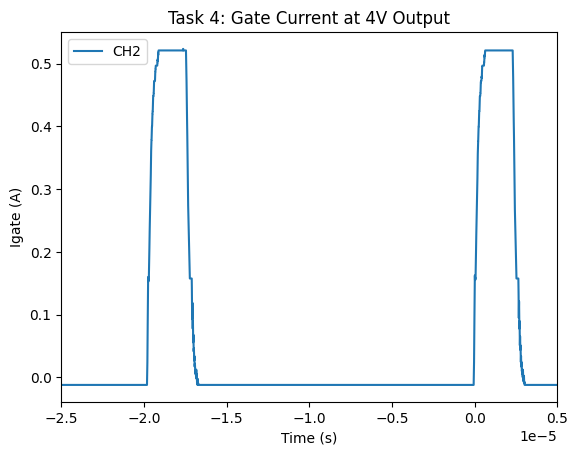

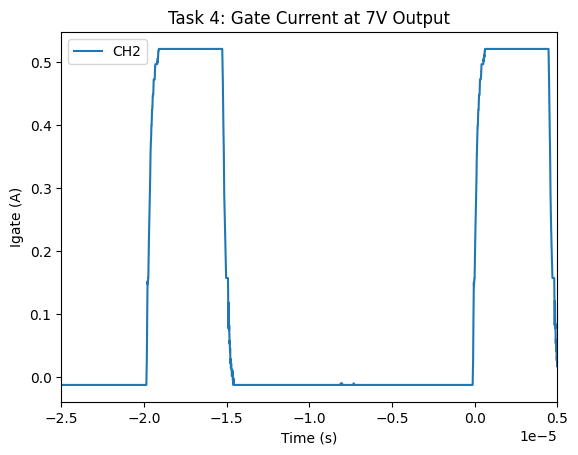

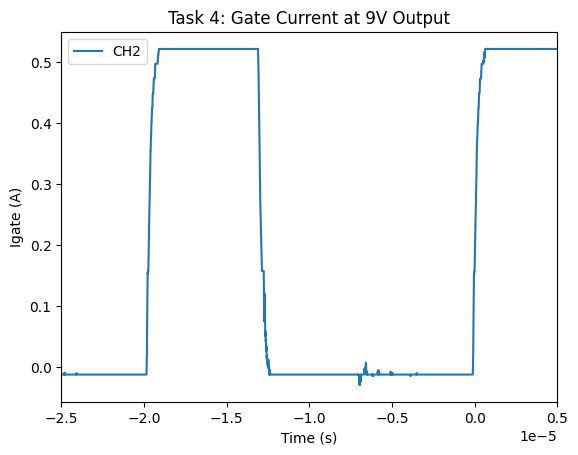

In [121]:
# Task 4 data: gate driver output and gate voltage at different output voltages
[task_4_4V_data, task_4_4V_t0, task_4_4V_dT] = read_rigol_csv('data/Task4_4V.csv')
[task_4_7V_data, task_4_7V_t0, task_4_7V_dT] = read_rigol_csv('data/Task4_7V.csv')
[task_4_9V_data, task_4_9V_t0, task_4_9V_dT] = read_rigol_csv('data/Task4_9V.csv')

# data filter
task_4_4V_data['CH2'] = task_4_4V_data['CH2'].rolling(10).mean()
task_4_7V_data['CH2'] = task_4_7V_data['CH2'].rolling(10).mean()
task_4_9V_data['CH2'] = task_4_9V_data['CH2'].rolling(10).mean()

# convert gate voltage to gate current using Ohm's law
Rgate = 33 #ohms
task_4_4V_data = task_4_4V_data.mul({"CH1":1,"CH2":(1/Rgate),"X":1})
task_4_7V_data = task_4_7V_data.mul({"CH1":1,"CH2":(1/Rgate),"X":1})
task_4_9V_data = task_4_9V_data.mul({"CH1":1,"CH2":(1/Rgate),"X":1})

#create gate current plots

#4V
fig, ax = plt.subplots()
task_4_4V_data.plot(x="X", y="CH2", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Igate (A)")
ax.set_title("Task 4: Gate Current at 4V Output")
ax.set_xlim((-2.5e-5,0.5e-5))

#7V
fig, ax = plt.subplots()
task_4_7V_data.plot(x="X", y="CH2", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Igate (A)")
ax.set_title("Task 4: Gate Current at 7V Output")
ax.set_xlim((-2.5e-5,0.5e-5))

#9V
fig, ax = plt.subplots()
task_4_9V_data.plot(x="X", y="CH2", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Igate (A)")
ax.set_title("Task 4: Gate Current at 9V Output")
ax.set_xlim((-2.5e-5,0.5e-5))

8. Looking at the datasheet for the switching MOSFET we are using (FDP61N10), I found an absolute maximum rating of 30V from gate to source. Our gate voltage reaches a maximum of ~17.5V, well below the maximum rating. 

9. Looking at the datasheet for the UC2844 chip, I found an absolute maximum rating of 1A for the output drive current and a recommended operating average output current of 200mA. Examining the highest average output current with an output voltage of 9V, we can see from the gate current waveform that the duty cycle is about ~0.35. This calculates to an average output current of 182mA, which is well matched for the recommended operating average output current listed.